In [1]:
import tensorflow as tf
import numpy as np
import math, random
import matplotlib.pyplot as plt

/Users/r3dmaohong/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
NUM_points = 1000
np.random.seed(NUM_points)
function_to_learn = lambda x: np.cos(x) + 0.1*np.random.rand(*x.shape)

In [8]:
layer_1_neurons = 10

batch_size = 100
NUM_EPOCHS = 1500

In [9]:
all_x = np.float32(np.random.uniform(low = -2*math.pi, high = 2*math.pi, size = (1, NUM_points))).T
np.random.shuffle(all_x)
train_size = int(900)

In [12]:
x_training = all_x[:train_size]
y_training = function_to_learn(x_training)

x_validation = all_x[train_size:]
y_validation = function_to_learn(x_validation)

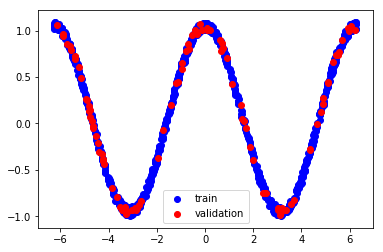

In [13]:
plt.figure(1)
plt.scatter(x_training, y_training, c='blue', label='train')
plt.scatter(x_validation, y_validation, c='red', label='validation')
plt.legend()
plt.show()

In [15]:
X = tf.placeholder(tf.float32, [None, 1], name='X')
Y = tf.placeholder(tf.float32, [None, 1], name='Y')

In [16]:
# weights
w_h = tf.Variable(tf.random_uniform([1, layer_1_neurons], minval=-1, maxval=1))

In [17]:
# biases
b_h = tf.Variable(tf.zeros([1, layer_1_neurons]))

In [18]:
h = tf.nn.sigmoid(tf.matmul(X, w_h) + b_h)

In [19]:
w_o = tf.Variable(tf.random_uniform(shape=[layer_1_neurons, 1], minval=-1, maxval=1))
b_o = tf.Variable(tf.zeros([1,1]))

In [20]:
model = tf.matmul(h, w_o) + b_o

In [21]:
train_optimizer = tf.train.AdamOptimizer().minimize(tf.nn.l2_loss(model-Y))

In [25]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    errors = []
    for i in range(NUM_EPOCHS):
        for start, end in zip( range(0, len(x_training), batch_size), range(batch_size, len(x_training), batch_size) ):
            sess.run(train_optimizer, feed_dict={X:x_training[start:end], Y:y_training[start:end]})
        cost = sess.run(tf.nn.l2_loss(model - y_validation), feed_dict={X:x_validation})
        errors.append(cost)
        if ((i+1)%100==0) | (i==0):
            print('Epoch %d, cost: %g' % (i+1, cost))

Epoch 1, cost: 78.7551
Epoch 100, cost: 25.2651
Epoch 200, cost: 24.7597
Epoch 300, cost: 23.3047
Epoch 400, cost: 21.0467
Epoch 500, cost: 18.6387
Epoch 600, cost: 16.2209
Epoch 700, cost: 14.0814
Epoch 800, cost: 12.0693
Epoch 900, cost: 9.54428
Epoch 1000, cost: 6.2716
Epoch 1100, cost: 3.53037
Epoch 1200, cost: 1.68983
Epoch 1300, cost: 0.725314
Epoch 1400, cost: 0.329039
Epoch 1500, cost: 0.19905


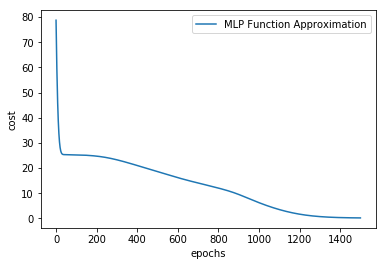

In [26]:
plt.plot(errors, label='MLP Function Approximation')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.legend()
plt.show()